# Klasteryzacja

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle


In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

names = iris.feature_names
X, y = shuffle(X, y, random_state=42)

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
iris_kmeans = kmeans.fit(X)

C:\Users\lamla\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
iris_kmeans.labels_

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2])

In [10]:
iris_kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

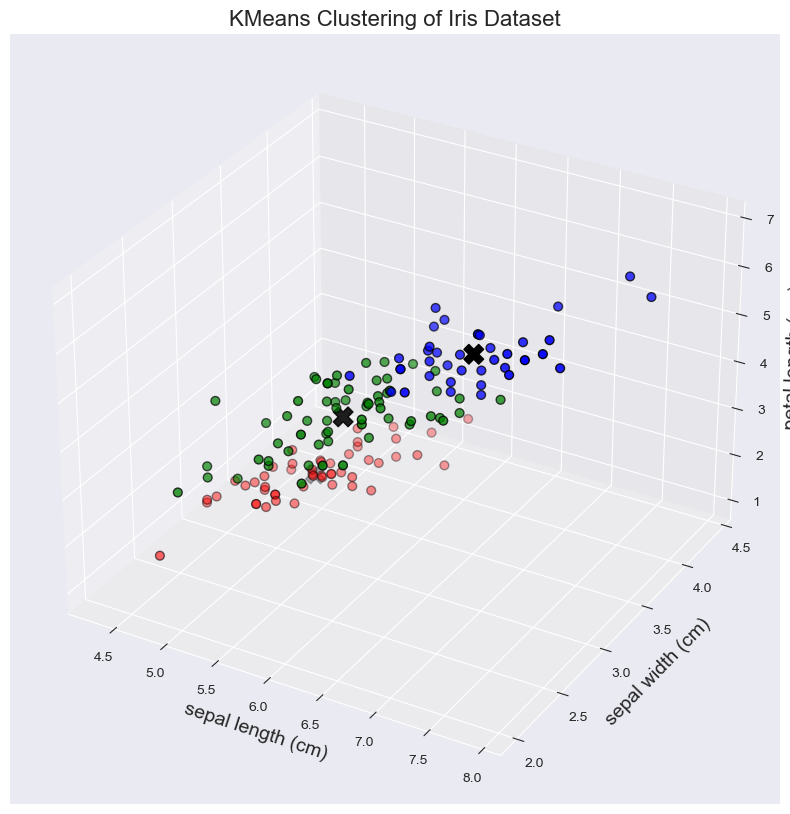

In [25]:
custom_cmap = ListedColormap(["r", "g", "b"])

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.scatter(
    X[:, 0],
    X[:, 1],
    X[:, 2],
    c=iris_kmeans.labels_,
    cmap=custom_cmap,
    s=40,
    edgecolors="k",
)
ax.scatter(
    iris_kmeans.cluster_centers_[:, 0],
    iris_kmeans.cluster_centers_[:, 1],
    iris_kmeans.cluster_centers_[:, 2],
    c="black",
    marker="X",
    s=200,
    label="Centroids",
    edgecolors="k",
)
ax.set_title("KMeans Clustering of Iris Dataset", fontsize=16)
ax.set_xlabel(names[0], fontsize=14)
ax.set_ylabel(names[1], fontsize=14)
ax.set_zlabel(names[2], fontsize=14)
plt.show()


In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(X, iris_kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, iris_kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X, iris_kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")

Silhouette Score: 0.553
Davies-Bouldin Index: 0.662
Calinski-Harabasz Index: 561.628
